# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

In [1]:
# Import libraries

# Pandas Numpy
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (10,8)

# Outliers
import scipy.stats as stats

# Train/test
from sklearn.model_selection import train_test_split

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Grid Search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
'''
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per 10,000usd
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population
'''

'\nCRIM per capita crime rate by town\nZN proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS proportion of non-retail business acres per town\nCHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX nitric oxides concentration (parts per 10 million)\nRM average number of rooms per dwelling\nAGE proportion of owner-occupied units built prior to 1940\nDIS weighted distances to five Boston employment centres\nRAD index of accessibility to radial highways\nTAX full-value property-tax rate per 10,000usd\nPTRATIO pupil-teacher ratio by town\nB 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT % lower status of the population\n'

### Import and explore the data. Clean the data for outliers and missing values. 

In [3]:
# Your code here
df= pd.read_csv('../data/boston_data.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
df.shape

(404, 14)

In [5]:
# Missing values
df.isnull().sum()
# No missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [7]:
# Outliers
for feature in df[df.columns]:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

crim yes
zn yes
indus no
chas yes
nox no
rm yes
age no
dis yes
rad no
tax no
ptratio no
black no
lstat yes
medv yes


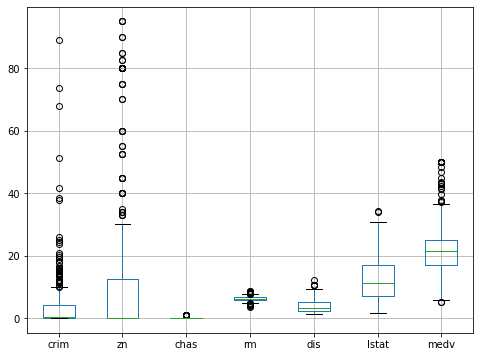

In [8]:
# Viz
plt.figure(figsize = (8,6))
outliers = ['crim', 'zn','chas', 'rm','dis','lstat', 'medv']

df.boxplot(column=outliers);

In [9]:
# Find Q1, Q3, and interquartile range for each column
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

In [10]:
# Only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

In [11]:
# Find how many rows are left in the dataframe 
df_clean.shape

(228, 14)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

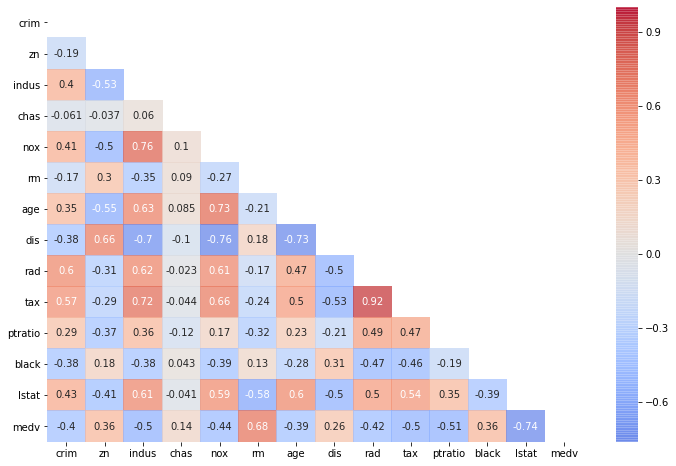

In [12]:
# Your plots here
plt.figure(figsize = (12,8))
# Mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', alpha = 0.7, center=0, mask=mask);

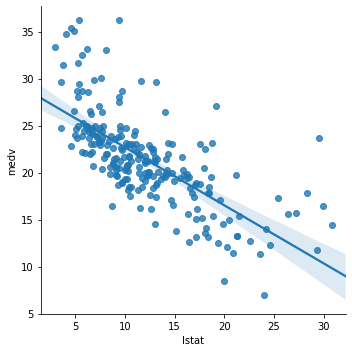

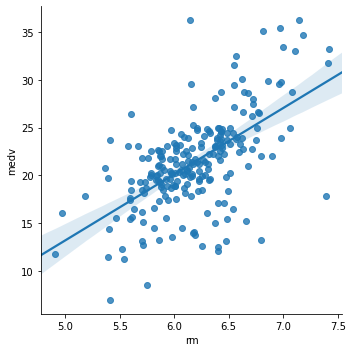

In [13]:
# Higher correlation variables: ['lstat', 'rm']
hcv = ['lstat','rm']

# pairplot
for i in hcv:
    sns.lmplot(x=i, y='medv', data=df_clean);

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [14]:
# Your response here

'''
RM (average number of rooms per dwelling) --> direct proporcionality (price increases with RM)
LSTAT (% lower status of the population) --> inverse proporcionality (price decreases with LSTAT)
'''

'\nRM (average number of rooms per dwelling) --> direct proporcionality (price increases with RM)\nLSTAT (% lower status of the population) --> inverse proporcionality (price decreases with LSTAT)\n'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

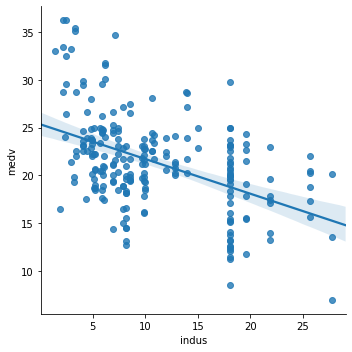

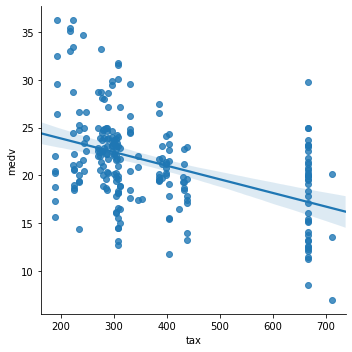

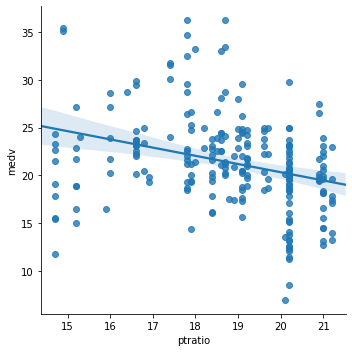

In [15]:
# Your response here
# Other correlation variables: ['indus', 'tax','ptratio']
ocv = ['indus', 'tax','ptratio']

# pairplot
for i in ocv:
    sns.lmplot(x=i, y='medv', data=df_clean);

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [16]:
# Your code here
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,1.348504,4.015351,10.827939,0.0,0.538482,6.186281,66.237281,3.998012,7.671053,371.710526,18.742544,389.028509,12.086798,21.412719
std,2.504425,8.724793,6.393417,0.0,0.103290,0.428421,27.103921,1.788350,7.442090,151.906285,1.771429,11.118071,5.633787,4.971316
min,0.006320,0.000000,1.380000,0.0,0.409000,4.903000,2.900000,1.345900,1.000000,188.000000,14.700000,344.050000,2.940000,7.000000
25%,0.083672,0.000000,5.860000,0.0,0.453000,5.888000,45.800000,2.501475,4.000000,278.500000,17.800000,386.572500,7.777500,18.775000
50%,0.171310,0.000000,8.560000,0.0,0.520000,6.167000,69.650000,3.665900,5.000000,307.000000,19.100000,393.410000,10.875000,21.200000
75%,0.777345,0.000000,18.100000,0.0,0.581000,6.437250,91.125000,5.400700,6.000000,403.000000,20.200000,396.900000,15.027500,23.825000
max,9.966540,30.000000,27.740000,0.0,0.871000,7.416000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,36.200000


In [17]:
df_clean.chas.unique()

array([0.])

In [18]:
len(df_clean.chas)

228

In [19]:
# df_clean

In [20]:
# drop chas column --> only null values!
# CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

df_clean = df_clean.drop(['chas'], axis=1)
df_clean.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [21]:
df_clean.medv.describe()

count    228.000000
mean      21.412719
std        4.971316
min        7.000000
25%       18.775000
50%       21.200000
75%       23.825000
max       36.200000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [22]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [23]:
# Your code here
X = df_clean.drop(['medv'], axis=1)
y = df_clean.medv

In [24]:
# Train/Test (90/10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [25]:
# Five separate RFR here with the given max depths

depths = [2, 4, 6, 8, 10 ]

# Model
rfrs = [RandomForestRegressor(n_estimators = 100, max_depth = i, random_state=123) for i in depths]
rfrs

[RandomForestRegressor(max_depth=2, random_state=123),
 RandomForestRegressor(max_depth=4, random_state=123),
 RandomForestRegressor(max_depth=6, random_state=123),
 RandomForestRegressor(max_depth=8, random_state=123),
 RandomForestRegressor(max_depth=10, random_state=123)]

In [26]:
# Fit
rfrs_fit = [rfr.fit(X_train, y_train) for rfr in rfrs]
rfrs_fit

[RandomForestRegressor(max_depth=2, random_state=123),
 RandomForestRegressor(max_depth=4, random_state=123),
 RandomForestRegressor(max_depth=6, random_state=123),
 RandomForestRegressor(max_depth=8, random_state=123),
 RandomForestRegressor(max_depth=10, random_state=123)]

In [27]:
# Score train
score_train = [performance_metric(y_train, rfr.predict(X_train)) for rfr in rfrs_fit]
score_train

[0.7152257143447489,
 0.8561242563360933,
 0.9237354181130422,
 0.9493154900006884,
 0.9569529648830719]

In [28]:
score_test = [performance_metric(y_test, rfr.predict(X_test)) for rfr in rfrs_fit]
score_test

[0.5931596277767972,
 0.6782621389989165,
 0.7190592359029547,
 0.7420261010787383,
 0.7427829357800131]

Now, plot the score for each tree on the training set and on the testing set.

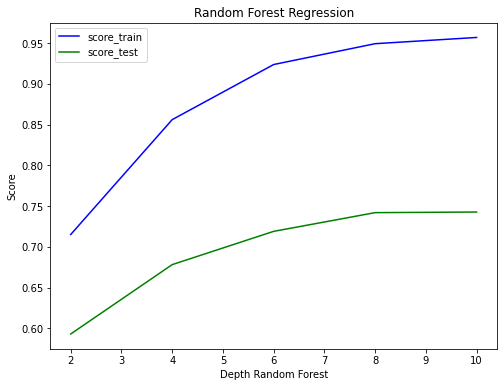

In [29]:
plt.figure(figsize = (8,6))
label=['score_train', 'score_test']

# Score Train
sns.lineplot(x=depths, y=score_train, color = 'blue')   
# Score Test
sns.lineplot(x=depths , y=score_test, color = 'green')  

plt.title('Random Forest Regression') 
plt.xlabel('Depth Random Forest')
plt.legend(label)
plt.ylabel('Score') 
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [30]:
# Your response here

# Over-fitting --> score_train >> score_test

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [31]:
# Your response here
# High-variance learning methods may be able to represent their training set well, but are at risk of overfitting to noisy or unrepresentative training data.
# High bias typically produce simpler models that don't tend to overfit, but may underfit their training data, failing to capture important regularities.

In [32]:
depths = [1,10]

# Fit
rfrs = [RandomForestRegressor(n_estimators = 100, max_depth = i, random_state=0) for i in depths]
rfrs

[RandomForestRegressor(max_depth=1, random_state=0),
 RandomForestRegressor(max_depth=10, random_state=0)]

In [33]:
# Fit
rfrs_fit = [rfr.fit(X_train, y_train) for rfr in rfrs]
rfrs_fit

[RandomForestRegressor(max_depth=1, random_state=0),
 RandomForestRegressor(max_depth=10, random_state=0)]

In [34]:
# Score train
score_train = [performance_metric(y_train, rfr.predict(X_train)) for rfr in rfrs_fit]
score_train

[0.46760583052874716, 0.9496420249744826]

In [35]:
score_test = [performance_metric(y_test, rfr.predict(X_test)) for rfr in rfrs_fit]
score_test

[0.3543566106104291, 0.7429104690075127]

Now, plot the score for each tree on the training set and on the testing set.

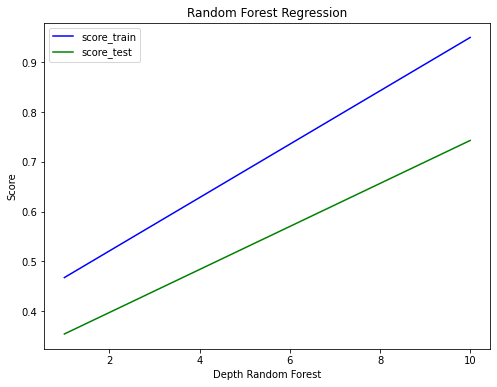

In [36]:
plt.figure(figsize = (8,6))
label=['score_train', 'score_test']

# Score Train
sns.lineplot(x=depths, y=score_train, color = 'blue')   
# Score Test
sns.lineplot(x=depths , y=score_test, color = 'green')  

plt.title('Random Forest Regression') 
plt.xlabel('Depth Random Forest')
plt.legend(label)
plt.ylabel('Score') 
plt.show()

In [37]:
# Depth = 1 --> Low Variance/ High Bias --> Overfitting
# Depth = 10 --> High Variance/ Low Bias --> Underfitting

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [38]:
# Your response here
params = {'max_depth': np.arange(1,20)}
model = RandomForestRegressor(n_estimators = 100, random_state=0) 

In [39]:
model_sel = GridSearchCV(model, params) 

In [40]:
model_sel.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [51]:
max_depth=model_sel.best_params_
print(f'The max_depth parameter that I think would optimize the model is: {max_depth.values()}')

The max_depth parameter that I think would optimize the model is: dict_values([8])


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [42]:
# Your response here